# Ilaryon Saladkou, IF2000079

# Dataset description:

In this individual project, a used vehicles Craigslist postings dataset (posted on Kaggle.com by Austin Reese, link:https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data) have been chosen to solve a problem of predicting an average market price of a used car based on its main parameters.

The dataset includes 29 columns and approximately 420k of rows. 
Based on the Kaggle.com data card, this dataset has 95-100% of valid entries for the columns which are most important for prediction(manufacturer, model, mileage, etc.)

# Goals and objectives of the project:

-To create and apply 1 non-NN method of machine learning and 2 NN methods to the chosen dataset to solve a problem of prediction of an average market price of a used car based on its main features and parameters.

-To estimate the prediction accuracy on the training and test set errors.

-To compare used methods of prediction.

Initial setup

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers, optimizers, callbacks
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

#print(plt.style.available)
plt.style.use('seaborn-v0_8')

Import data frame

In [2]:
df = pd.read_csv('vehicles.csv') 

# Viewing and analyzing the initial dataset

In [3]:
display(df)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [5]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


## Dataset preparation:

We can see a certain number of columns which have to use for solving the prediction problem, such as id's, VIN, size, URLs, description.
During the course of this project, I will also refrain from using columns which can be pertinent for price predicion, yet their usefullness is questionable, such as geographical and time features. 

Therefore, these columns can be removed from the dataframe

In [6]:
df = df.drop(['id', 'url', 'region', 'region_url', 'VIN', 'size', 'image_url', 'description', 'county', 'state', 'state', 'lat', 'long', 'posting_date', 'transmission', 'paint_color', 'title_status', 'type', 'fuel'], axis=1)


We will also remove rows where price is less than 100$ since this is probably not the real price

In [7]:
df.drop(df.loc[df['price']<=100].index, inplace=True)

We will also cut the model string to the first 2 words in it. Model names are in many cases include too much info, e.g. package name, drive type.

In [8]:
df['model'] = df['model'].apply(lambda x: " ".join(x.split()[:2]) if isinstance(x, str) else x)

We can see, there are a lot of rows with missing values. 

I am going to delete all rows which contain any empty cells, which is going to drastically cut the amount of useful data, however will still leave more than 100k of rows to work with.

For 13 features, 100k rows is a perfectly adequate amount of data.

In [9]:
df.describe()

,price,year,odometer
count,3.904910e+05,389318.000000,3.882090e+05
mean,8.220635e+04,2011.016367,9.850422e+04
std,1.273724e+07,9.575700,1.991647e+05
min,1.010000e+02,1900.000000,0.000000e+00
25%,7.495000e+03,2008.000000,3.800000e+04
50%,1.550000e+04,2013.000000,8.712400e+04
75%,2.791750e+04,2017.000000,1.356780e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [10]:
df = df.dropna(ignore_index=True)

In [11]:
display(df)

,price,year,manufacturer,model,condition,cylinders,odometer,drive
0,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,128000.0,rwd
1,27990,2012.0,gmc,sierra 2500,good,8 cylinders,68696.0,4wd
2,34590,2016.0,chevrolet,silverado 1500,good,6 cylinders,29499.0,4wd
3,35000,2019.0,toyota,tacoma,excellent,6 cylinders,43000.0,4wd
4,29990,2016.0,chevrolet,colorado extended,good,6 cylinders,17302.0,4wd
...,...,...,...,...,...,...,...,...
136435,39990,2017.0,infiniti,qx80 sport,good,8 cylinders,41664.0,4wd
136436,32990,2016.0,infiniti,qx80 sport,good,8 cylinders,55612.0,rwd
136437,33590,2018.0,lexus,gs 350,good,6 cylinders,30814.0,rwd
136438,23590,2019.0,nissan,maxima s,good,6 cylinders,32226.0,fwd


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136440 entries, 0 to 136439
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         136440 non-null  int64  
 1   year          136440 non-null  float64
 2   manufacturer  136440 non-null  object 
 3   model         136440 non-null  object 
 4   condition     136440 non-null  object 
 5   cylinders     136440 non-null  object 
 6   odometer      136440 non-null  float64
 7   drive         136440 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 8.3+ MB


### Removing outliers:

In [13]:
from scipy import stats
df_outliers_filtered = df.select_dtypes(include=['int', 'float'])
Q1 = df_outliers_filtered.quantile(0.25)
Q3 = df_outliers_filtered.quantile(0.75)
IQR = Q3 - Q1

mask = (df_outliers_filtered < (Q1 - 1.5 * IQR)) | (df_outliers_filtered > (Q3 + 1.5 * IQR))
df = df[~(mask).any(axis=1)]



In [14]:
display(df)

,price,year,manufacturer,model,condition,cylinders,odometer,drive
0,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,128000.0,rwd
1,27990,2012.0,gmc,sierra 2500,good,8 cylinders,68696.0,4wd
2,34590,2016.0,chevrolet,silverado 1500,good,6 cylinders,29499.0,4wd
3,35000,2019.0,toyota,tacoma,excellent,6 cylinders,43000.0,4wd
4,29990,2016.0,chevrolet,colorado extended,good,6 cylinders,17302.0,4wd
...,...,...,...,...,...,...,...,...
136435,39990,2017.0,infiniti,qx80 sport,good,8 cylinders,41664.0,4wd
136436,32990,2016.0,infiniti,qx80 sport,good,8 cylinders,55612.0,rwd
136437,33590,2018.0,lexus,gs 350,good,6 cylinders,30814.0,rwd
136438,23590,2019.0,nissan,maxima s,good,6 cylinders,32226.0,fwd


### Selecting the feature:

In [15]:
X = df.copy()
y = X.pop('price')
y

0         15000
1         27990
2         34590
3         35000
4         29990
          ...  
136435    39990
136436    32990
136437    33590
136438    23590
136439    28990
Name: price, Length: 126815, dtype: int64

In [16]:
y.describe()

count    126815.000000
mean      15335.883839
std       11602.843584
min         103.000000
25%        6000.000000
50%       11500.000000
75%       22903.000000
max       49750.000000
Name: price, dtype: float64

In [17]:
df.describe()

,price,year,odometer
count,126815.000000,126815.000000,126815.000000
mean,15335.883839,2010.796499,107546.987722
std,11602.843584,5.762860,61087.597513
min,103.000000,1993.000000,0.000000
25%,6000.000000,2007.000000,60002.500000
50%,11500.000000,2012.000000,106465.000000
75%,22903.000000,2015.000000,149718.500000
max,49750.000000,2022.000000,287777.000000


### Splitting into train and test sets:

In [18]:
X_test = X.sample(frac=0.25)
y_test = y[X_test.index]
X_pretrain = X.drop(X_test.index)
y_train = y[X_pretrain.index]

In [19]:
from category_encoders import TargetEncoder
from category_encoders import OrdinalEncoder

### Encoding categorical features:

Setting Target encoder for manufacturer and model features, Ordinal encoder for orderable features

In [20]:
tEncoder = TargetEncoder(cols=["manufacturer", "model"], min_samples_leaf=5, smoothing=10)

mapping= [
    {
        'col': 'condition', 
        'mapping': {
            None: 0, 
            'salvage': 1, 
            'fair': 2, 
            'good': 3, 
            'excellent': 4, 
            'like new': 5, 
            'new': 6}
    },
    {
        'col':'cylinders', 
        'mapping': {
            None:0, 
            'other':0, 
            '3 cylinders':3, 
            '4 cylinders':4, 
            '5 cylinders':5, 
            '6 cylinders':6, 
            '8 cylinders':8, 
            '10 cylinders':10, 
            '12 cylinders':12
            }
    },
    {
        'col': 'drive',
        'mapping': {
            None: 0,
            'fwd':1,
            'rwd':1,
            '4wd':2,

        }
    }
        ]
oEncoder = OrdinalEncoder(cols=["condition", "cylinders", "drive"], mapping=mapping)

In [21]:
y_train.describe()

count    95111.000000
mean     15357.504779
std      11595.065501
min        103.000000
25%       6000.000000
50%      11500.000000
75%      22950.000000
max      49750.000000
Name: price, dtype: float64

Price parameter distribution:

### Applying the encoders:

In [22]:
# Fit the encoder on the encoding split.
tEncoder.fit(X_test, y_test)


# Encode the Zipcode column to create the final training data
X_train = tEncoder.transform(X_pretrain)


oEncoder.fit(X_test, y_test)
X_train = oEncoder.transform(X_train)

In [23]:
display(X_train)

,year,manufacturer,model,condition,cylinders,odometer,drive
0,2013.0,16858.282716,21672.010538,4,6,128000.0,1
1,2012.0,21126.528832,32507.723792,3,8,68696.0,2
2,2016.0,17254.314996,23005.319892,3,6,29499.0,2
4,2016.0,17254.314996,27820.968715,3,6,17302.0,2
5,2011.0,17254.314996,38027.513439,3,8,30237.0,1
...,...,...,...,...,...,...,...
136432,2019.0,14385.095172,26540.645758,3,6,36630.0,2
136434,2020.0,13176.312236,17348.010850,3,6,7701.0,1
136435,2017.0,19679.580796,29003.742234,3,8,41664.0,2
136436,2016.0,19679.580796,29003.742234,3,8,55612.0,1


### Descriptive statistics of data:

Price(target parameter) plots:

In [24]:
y_train.describe()

count    95111.000000
mean     15357.504779
std      11595.065501
min        103.000000
25%       6000.000000
50%      11500.000000
75%      22950.000000
max      49750.000000
Name: price, dtype: float64

C:\Users\Larry\AppData\Local\Temp\ipykernel_4424\3291262719.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train)


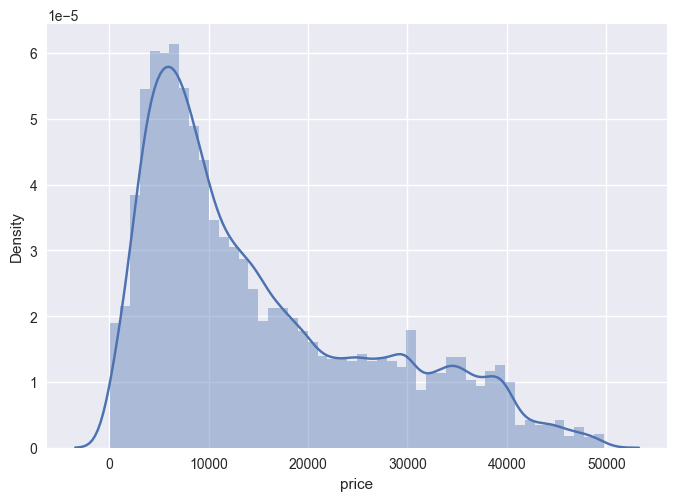

<Figure size 800x550 with 0 Axes>

In [25]:
sns.distplot(y_train)
fig = plt.figure()

In [26]:
X_train.describe()

,year,manufacturer,model,condition,cylinders,odometer,drive
count,95111.000000,95111.000000,95111.000000,95111.000000,95111.000000,95111.000000,95111.000000
mean,2010.800496,15250.990345,15532.043269,3.651922,5.913774,107456.245198,1.437878
std,5.769602,3968.026759,7551.174046,0.728936,1.604666,61076.695501,0.496128
min,1993.000000,3982.317008,3772.333753,1.000000,0.000000,0.000000,1.000000
25%,2007.000000,12661.878216,9564.650537,3.000000,4.000000,60000.000000,1.000000
50%,2012.000000,16858.282716,13785.510850,4.000000,6.000000,106400.000000,1.000000
75%,2015.000000,17254.314996,19337.926592,4.000000,8.000000,149353.000000,2.000000
max,2022.000000,28284.286400,39488.994100,6.000000,12.000000,287777.000000,2.000000


Checking the correlation:

In [27]:
X_train.corr()

,year,manufacturer,model,condition,cylinders,odometer,drive
year,1.000000,0.068898,0.287899,0.157247,-0.122787,-0.598192,0.068958
manufacturer,0.068898,1.000000,0.444073,-0.059509,0.452497,-0.061076,0.270082
model,0.287899,0.444073,1.000000,-0.156363,0.510050,-0.318798,0.269756
condition,0.157247,-0.059509,-0.156363,1.000000,-0.122639,-0.125743,0.018124
cylinders,-0.122787,0.452497,0.510050,-0.122639,1.000000,0.047120,0.253702
odometer,-0.598192,-0.061076,-0.318798,-0.125743,0.047120,1.000000,0.041639
drive,0.068958,0.270082,0.269756,0.018124,0.253702,0.041639,1.000000


Text(0.5, 1.0, 'Heatmap of all the Features of Train data set')

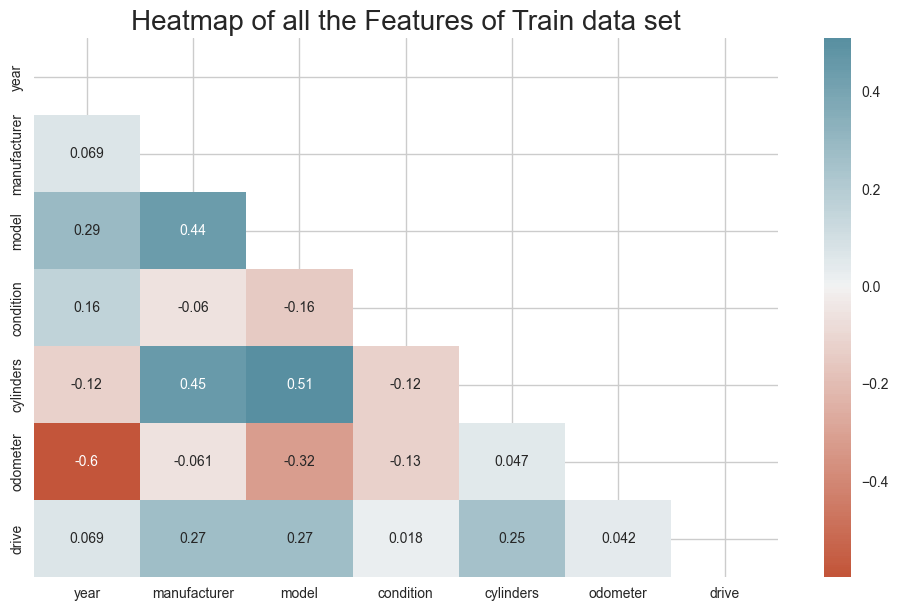

In [28]:
plt.style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(X_train.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(X_train.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0)
plt.title("Heatmap of all the Features of Train data set", fontsize = 20)

Relation of price and odometer value:

<Axes: xlabel='odometer', ylabel='price'>

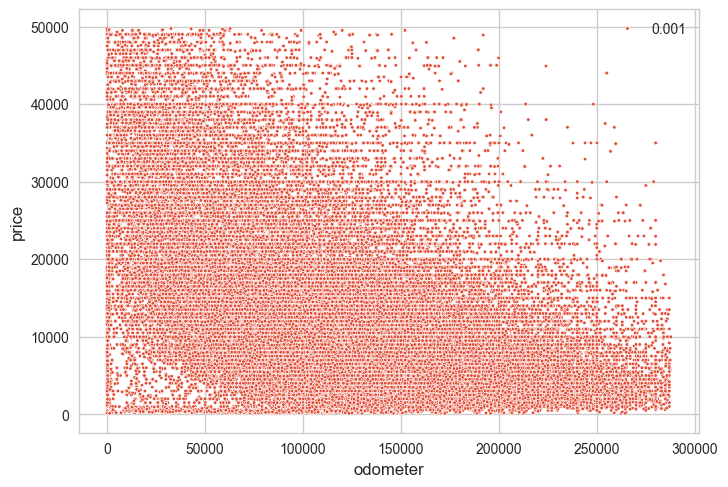

In [29]:
sns.scatterplot(df, x='odometer', y='price', marker=".", size=0.001)

Percentage of cars with different number of cylinders:

<Axes: xlabel='cylinders', ylabel='Percent'>

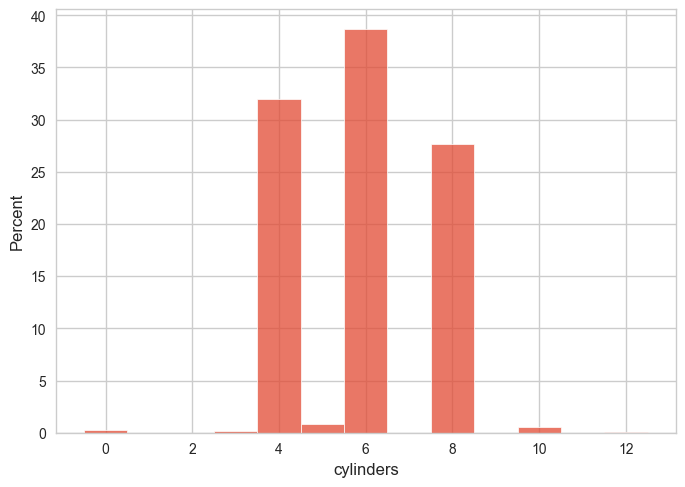

In [30]:
sns.histplot(X_train['cylinders'], stat='percent', discrete=True)

<Axes: xlabel='Percent', ylabel='manufacturer'>

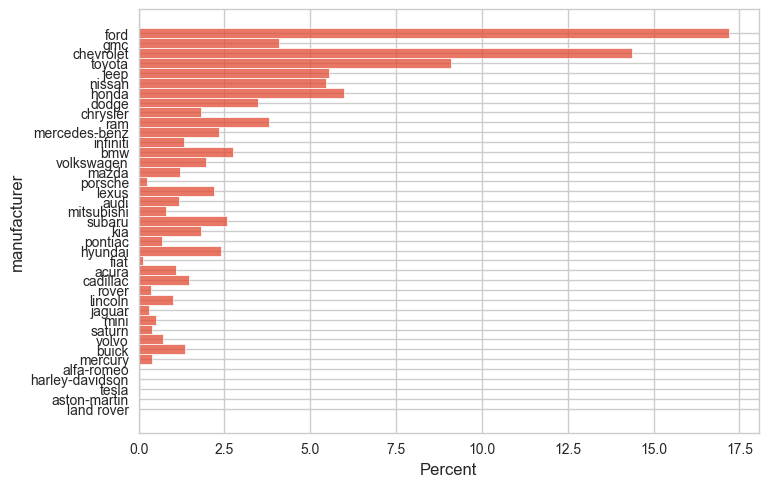

In [31]:
sns.histplot(data=df, y='manufacturer', stat='percent')

### Scaling:

In [32]:
scaler = StandardScaler()
scaler.set_output(transform='pandas')

feature_names = X_train.columns

X_train = scaler.fit(X_train).transform(X_train)

In [33]:
display(X_train)

,year,manufacturer,model,condition,cylinders,odometer,drive
0,0.381225,0.405063,0.813119,0.477517,0.053735,0.336362,-0.882594
1,0.207902,1.480728,2.248097,-0.894352,1.300106,-0.634619,1.133023
2,0.901194,0.504869,0.989689,-0.894352,0.053735,-1.276390,1.133023
4,0.901194,0.504869,1.627428,-0.894352,0.053735,-1.476090,1.133023
5,0.034579,0.504869,2.979085,-0.894352,1.300106,-1.264306,-0.882594
...,...,...,...,...,...,...,...
136432,1.421163,-0.218219,1.457874,-0.894352,0.053735,-1.159634,1.133023
136434,1.594486,-0.522852,0.240489,-0.894352,0.053735,-1.633287,-0.882594
136435,1.074517,1.116075,1.784063,-0.894352,1.300106,-1.077213,1.133023
136436,0.901194,1.116075,1.784063,-0.894352,1.300106,-0.848843,-0.882594


# Setting up regressors:
In this project I am going to use 1 method of supervised learning - Random Forest and 2 neural network types - Multi Layer Perceptron and Recurrent Neural Network

Create a Random Forest Regressor

In [34]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_features='sqrt')

Create an MLP regressor:

In [35]:
from keras.models import Sequential
from keras import layers

import tensorflow as tf
from keras.models import Sequential
from keras.layers import InputLayer
from keras.layers import Dense

np.random.seed(1552)

def create_mlp_model():
    model = Sequential()
    model.add(InputLayer(input_shape = X_train.shape[1]))
    model.add(Dense(6, activation="relu", name="layer1"))
    model.add(Dense(6, activation="relu", name="layer2"))
    model.add(Dense(1, activation = "linear", name="layer3"))
    return model

mlp_regressor = create_mlp_model()
mlp_regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 6)                 48        
                                                                 
 layer2 (Dense)              (None, 6)                 42        
                                                                 
 layer3 (Dense)              (None, 1)                 7         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Create an RNN model:

In [36]:
X_train_reshaped = X_train.to_numpy().reshape((X_train.shape[0], 1, X_train.shape[1]))
def create_rnn_model():
    model = Sequential()
    model.add(layers.InputLayer(input_shape=(1, X_train.shape[1]))),
    model.add(layers.SimpleRNN(6, activation='relu')),
    model.add(layers.Dense(6, activation='relu')),
    model.add(layers.Dense(1, activation='linear'))
    return model
    
rnn_model = create_rnn_model()
rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 6)                 84        
                                                                 
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 133 (532.00 Byte)
Trainable params: 133 (532.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Train the models on the training data

Prepare the validation set for validation(encode, scale):

In [37]:
X_test = tEncoder.transform(X_test)
X_test = oEncoder.transform(X_test)
X_test = scaler.transform(X_test)

Train the Random Forest model:

In [38]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', random_state=42)

Train the MLP model:

In [39]:
import datetime
import os

mlp_regressor.compile(
    optimizer = "rmsprop",
    loss = "mse",
    metrics = ['mae'])


mlp_history = mlp_regressor.fit(X_train, y_train, epochs = 10, batch_size=8,verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
11889/11889 [==============================] - 12s 977us/step - loss: 217911776.0000 - mae: 11253.4385 - val_loss: 46930220.0000 - val_mae: 5361.0308
Epoch 2/10
11889/11889 [==============================] - 12s 988us/step - loss: 36994300.0000 - mae: 4342.0000 - val_loss: 29865280.0000 - val_mae: 3718.4260
Epoch 3/10
11889/11889 [==============================] - 12s 985us/step - loss: 31440872.0000 - mae: 3758.9951 - val_loss: 28856726.0000 - val_mae: 3601.9565
Epoch 4/10
11889/11889 [==============================] - 12s 982us/step - loss: 30910072.0000 - mae: 3687.9482 - val_loss: 28399832.0000 - val_mae: 3548.2441
Epoch 5/10
11889/11889 [==============================] - 11s 955us/step - loss: 30619836.0000 - mae: 3655.7820 - val_loss: 28107394.0000 - val_mae: 3507.9265
Epoch 6/10
11889/11889 [==============================] - 12s 983us/step - loss: 30433428.0000 - mae: 3637.9209 - val_loss: 28050434.0000 - val_mae: 3510.3860
Epoch 7/10
11889/11889 [====================

Train the RNN model:

In [40]:
X_test_reshaped = X_test.to_numpy().reshape((X_test.shape[0], 1, X_test.shape[1]))

rnn_model.compile(optimizer='rmsprop', loss='mse', metrics = ['mae'])

rnn_history = rnn_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=8, shuffle=True, validation_data=(X_test_reshaped, y_test))

Epoch 1/10


11889/11889 [==============================] - 14s 1ms/step - loss: 157347040.0000 - mae: 8790.8340 - val_loss: 31992908.0000 - val_mae: 3852.4495
Epoch 2/10
11889/11889 [==============================] - 14s 1ms/step - loss: 32045114.0000 - mae: 3773.5886 - val_loss: 28812946.0000 - val_mae: 3572.5979
Epoch 3/10
11889/11889 [==============================] - 14s 1ms/step - loss: 30787972.0000 - mae: 3664.5984 - val_loss: 28199188.0000 - val_mae: 3507.2893
Epoch 4/10
11889/11889 [==============================] - 13s 1ms/step - loss: 30465790.0000 - mae: 3639.8069 - val_loss: 27949096.0000 - val_mae: 3490.0769
Epoch 5/10
11889/11889 [==============================] - 13s 1ms/step - loss: 30288096.0000 - mae: 3625.3354 - val_loss: 27814972.0000 - val_mae: 3478.1272
Epoch 6/10
11889/11889 [==============================] - 13s 1ms/step - loss: 30152720.0000 - mae: 3616.6221 - val_loss: 27776694.0000 - val_mae: 3482.1309
Epoch 7/10
11889/11889 [==============================] - 14s 1ms/st

# Validation and evaluation

### Do predictions using the model:

In [41]:
# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)
mlp_y_pred = mlp_regressor.predict(X_test)
rnn_y_pred = rnn_model.predict(X_test_reshaped)

991/991 [==============================] - 1s 689us/step


### Evaluate the models:

Random forest model:

In [56]:
mean_absolute_error(y_test, rf_y_pred)

1679.6081041494517

In [55]:
r2_score(y_test, rf_y_pred)

0.9262797223950667

Multilayer Perceptron Model:

In [43]:
r2_score(y_test, mlp_y_pred)

0.7948407357897365

Recurrent Neural Network Model:

In [44]:
r2_score(y_test, rnn_y_pred)

0.7963310007386359

Plot Training and Validations MAE and loss

In [45]:
def plotLossAndMae(history):
    fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

    train_mae = history.history['mae']
    val_mae = history.history['val_mae']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    ax1.plot(train_mae, label='train')
    ax1.plot(val_mae, label='validation')
    ax1.set_title("MAE")

    ax2.plot(train_loss, label='train')
    ax2.plot(val_loss, label='validation')
    ax2.set_title("Loss")

    ax1.legend()
    ax2.legend()

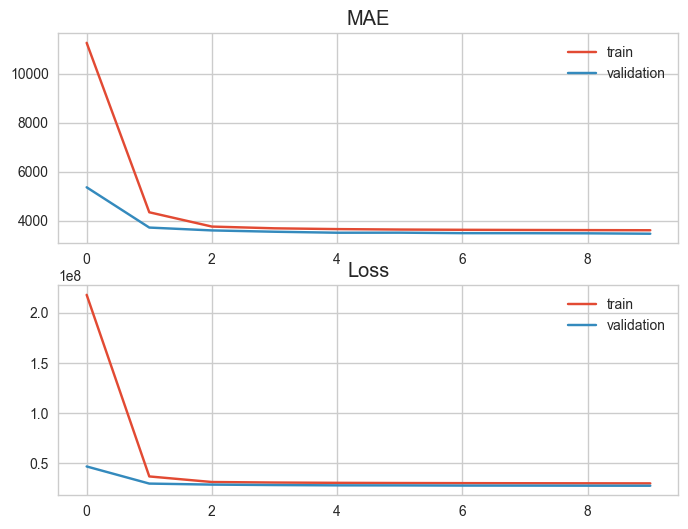

In [46]:
plotLossAndMae(mlp_history)

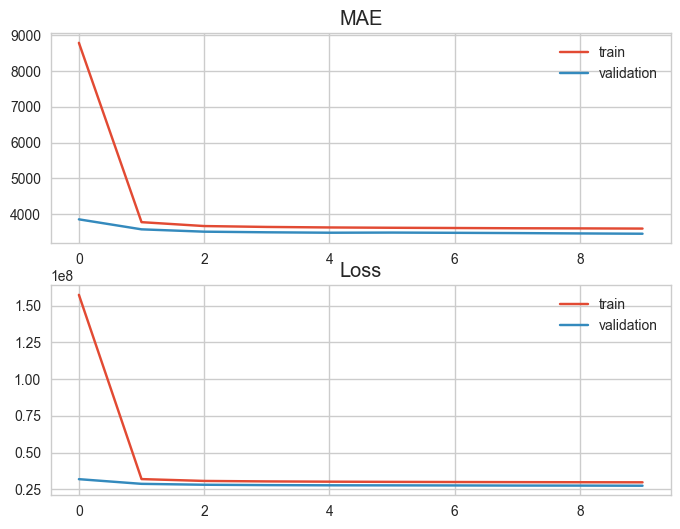

In [47]:
plotLossAndMae(rnn_history)

# Influence of the parameters on the results of the prediction:
Multiple parameters have been adjusted in order to improve the results of the predictions:
1. Target Encoder parameters(min samples leaf and smoothing) were decreased, which have slightly improved the r2 score and reduces errors.

2. NN architecture (number of layers, number of neurons in each layer, activation function). Number of hidden layer has been set to 2 by default, increasing it to 3 gave no significant results. Number of neurons per layer has been chosen according to a rule of thumb(2/3*input + output), increasing this number gave no significant result. Different "ReLU-type" activation functions were tried, no improvements were observed.

3. NN training parameters(number of epochs, batch size). Increasing number of epochs improves final result, however, after 10 tries gains become minimal, while computational complexity continues to grow. Increasing batch size reduces computational time and takes better advantage of the GPU capabilities, but reduces the model's score.

# Comparison of different machine learning methods

Visualize predictions in comparison with actual values:

In [48]:
def Graph_prediction_comparison(n, y_actual, y_predicted_1, y_predicted_2, y_predicted_3):
    y = y_actual
    number = n
    aa=[x for x in range(number)]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, y[:number], 'b', marker='.', label="actual")
    plt.plot(aa, y_predicted_1[:number], 'r', label="Random Forest")
    plt.plot(aa, y_predicted_2[:number], 'g', label="MLP")
    plt.plot(aa, y_predicted_2[:number], 'c', label="RNN")
    plt.xlabel('Price prediction of first {} used cars'.format(number), size=15)
    plt.legend(fontsize=15)
    plt.show()

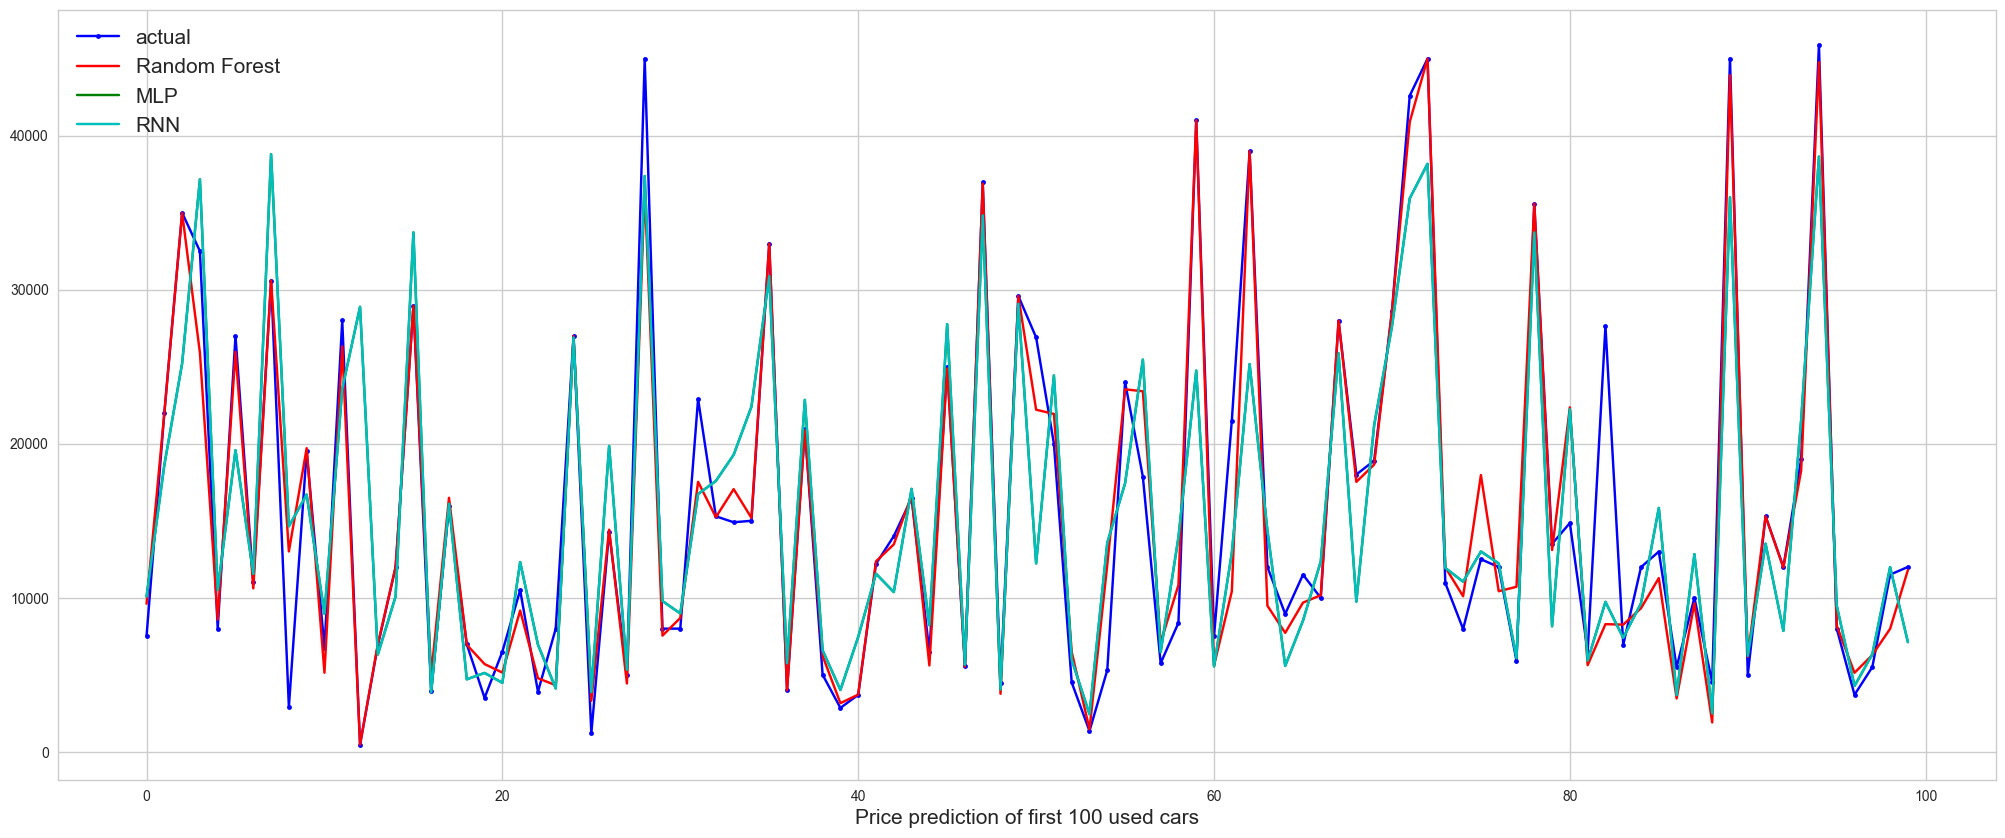

In [49]:
Graph_prediction_comparison(100, y_test, rf_y_pred, mlp_y_pred, rnn_y_pred)

### Comparison conclusions
3 different machine learning methods have been used: Random Forest, MLP and RNN.
The results of the training and evaluating results have shown that:
    1. The best results in terms of performance, setup simplicity and accuracy were demonstrated by the Random Forest method, its training with 100 estimators has taken only 19s, it has achieved an r2 score of 0.925 and shown the closest predictions on the comparison graph above.
    2. Second place in terms of accuracy belongs to the RNN network, it has achieved score of 0.793. Its training, however, took slightly more time, 13-14s per epoch comparing with 11-12s of MLP network. Additionaly, its setup complexity has been higher than the MLP variant.
    3. The MLP network is a little less accurate with the score of 0.792. On the other hand, its performance and setup simplicity are better than the RNN.
    4. The 2 neural network methods showed very close results. Possibly, the difference could be bigger if the parameters of the networks were different.

# Conclusion
Different machine learning methods were tried and tested during this individual assignment.

Multiple data preparation techniques were implemented to prepare the dataset for the algorithms.

As a result, 3 prediction-making models were created. The models demonstrated adequate performance in prediction of a price of a used car based on its main parameters.

The performance of said models was validated usind validation part of the dataset, the predicted values were compared to the actual ones, the predictions were adequately close to the real values.

The model were compared based on their accuracy metrics, computational performance and simplicity in coding.

The results showed the advantage of supervised learning method(random forest) in solving this type of problems.

The neural network methods were found to be inferior to the supervised learning method, however they still have showed acceptable results.